# 🐼 pandas 실습: 데이터 불러오기부터 분석·저장까지

> **pandas**는 엑셀처럼 데이터를 다루는 파이썬 라이브러리입니다.  
>  
> 이번 실습에서는 데이터 분석의 전체 과정을 단계별로 배웁니다.  
>  
> 아래 8단계를 차례로 실습하며, **데이터를 불러오고 → 살펴보고 → 가공하고 → 저장하는 전 과정**을 익힙니다.

---

## 🧭 실습 단계

1️⃣ **데이터 불러오기 (Import)**  (외부데이터 엑셀 같은거 불러오기. 이때 불러오기의 의미는 엑셀 파일을 코랩에서 인식할 수 있도록 데이터프레임으로 변환하는 것이다 - 판다스 필요! 엑셀 불러오면 자연스럽게 데이터프레임으로 엑셀이 읽어진다)

2️⃣ **데이터 살펴보기 (Inspect)**  
3️⃣ **열 선택 / 삭제 (Select & Drop)**  
4️⃣ **조건 필터 (Filter)**  
5️⃣ **정렬 (Sort)**  
6️⃣ **그룹 요약 (Groupby)**  
7️⃣ **간단한 통계 (Statistics)**  
8️⃣ **데이터 저장하기 (Export)**

## 📂 1️⃣ 데이터 불러오기 (Import)

> Colab에서 **Google Drive를 연결**하고,  
> 저장된 **엑셀 또는 CSV 파일을 불러오는 단계**입니다.  
>  
> 예시 파일명: `전국교통사고다발지역표준데이터_031324.xlsx`

---

### 📘 기본 개념

* Colab에서 외부 데이터 파일을 사용하려면 **Google Drive와 연동(mount)** 해야 함  
* 분석할 파일이 저장된 **경로(path)** 를 정확히 지정해야 함  
* 경로를 잘못 지정하면 **FileNotFoundError** 발생  
* 일반적으로 **CSV 파일** 사용을 권장 (`.csv` = 콤마로 구분된 텍스트 파일)  
* **엑셀 파일(.xlsx)** 형식도 사용 가능  
* pandas의 `pd.read_csv()` 또는 `pd.read_excel()` 함수로 파일을 불러올 수 있음  

---

💡 **Tip**

* “파일 불러오기” 후에는 데이터를 직접 확인해야 합니다.  
* `head()`, `info()`, `describe()` 등을 활용하여  
  데이터의 구조, 크기, 결측치, 자료형 등을 살펴봅니다.

  
🧠 비유로 이해하기

* 엑셀 파일 = 파일 형태로 저장된 표

* pd.read_excel() = 외부 엑셀 파일을 열어 판다스의 표(데이터프레임)로 변환

* 데이터프레임(DataFrame) = 파이썬이 이해하고 조작할 수 있는 표

* 즉, pd.read_excel(file_path) 는 단순히 엑셀 파일을 여는 것이 아니라,엑셀 안에 있는 표(행과 열로 이루어진 데이터)를
Pandas의 DataFrame 객체로 변환하는 과정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# ----------------------------------------------------
# 📂 1️⃣ Google Drive와 Colab 연결 (mount)
# ----------------------------------------------------
# Colab은 클라우드 환경이므로, 내 구글 드라이브를 연결해야
# 내 드라이브 안의 파일을 읽거나 저장할 수 있습니다.
from google.colab import drive
drive.mount('/content/drive')  # 실행 후 계속 OK 하면 연결 완료!

# ----------------------------------------------------
# 🐼 2️⃣ pandas 라이브러리 불러오기
# ----------------------------------------------------
import pandas as pd  # 데이터 분석용 필수 라이브러리

# ----------------------------------------------------
# 📘 3️⃣ 엑셀 파일 불러오기
# ----------------------------------------------------
# pd.read_excel("파일 경로") 함수를 사용하여 데이터 파일을 읽어옵니다.
# 아래 경로는 예시이므로, 자신의 파일 경로에 맞게 수정해야 합니다.
mydata = pd.read_excel("/content/drive/MyDrive/mypython/mypandas/전국교통사고다발지역표준데이터_031324.xlsx")
type(mydata)  # -> 판다스로 나옴!

# 판다스 쓸건데 엑셀 파일 읽는 함수를 사용해서 다음의 파일을 가져오고 데이터프레임으로 읽을래!! 까지 가는 코드임.
#이 mydata에 들어간 것은 엑셀 파일이 아닌 '''데이터프레임''이다.
# 엑셀파일을 불러오는 함수(판다스안에 있는 함수) read_excel


# 불러온 데이터 미리보기 (앞부분 5행 출력)
mydata.head()

# ----------------------------------------------------
# 💡 참고: CSV 파일 불러오기
# ----------------------------------------------------
# CSV 파일을 사용할 경우 다음처럼 불러올 수 있습니다. #누가 csv주면 이걸로 작업해라! 판다스에 read_csv라는 함수도 있다~
# mydata = pd.read_csv("/content/drive/MyDrive/mypython/mypandas/sample.csv", encoding='utf-8')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,사고지역관리번호,사고연도,사고유형구분,위치코드,사고다발지역시도시군구,사고지역위치명,사고건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자,제공기관코드,제공기관명
0,169921,2015,보행노인사고,11110400,서울특별시 종로구,서울특별시 중구 오장동(오장동사거리 부근),4,0,0,3,1,0,37.564700,127.003907,"""{type:Polygon,coordinates:[[[127.0063079,37.5...",2018-01-11,AAAAAAA,공공데이터활용지원센터
1,220162,2015,보행노인사고,11113400,서울특별시 종로구,서울특별시 강남구 도곡동(부영빌딩 부근),5,5,0,5,0,0,37.487416,127.032814,"""{type:Polygon,coordinates:[[[127.0352122,37.4...",2018-01-11,AAAAAAA,공공데이터활용지원센터
2,220164,2015,보행노인사고,27220500,서울특별시 종로구,대구광역시 수성구 수성동4가(신천시장네거리 부근),5,6,1,3,2,0,35.862361,128.617914,"""{type:Polygon,coordinates:[[[128.6202629,35.8...",2018-01-11,AAAAAAA,공공데이터활용지원센터
3,220166,2015,보행노인사고,29240300,서울특별시 종로구,광주광역시 서구 양동(양유교종점 부근),5,5,2,2,1,0,35.153686,126.900554,"""{type:Polygon,coordinates:[[[126.9028823,35.1...",2018-01-11,AAAAAAA,공공데이터활용지원센터
4,220169,2015,보행노인사고,11113200,서울특별시 종로구,서울특별시 은평구 대조동(동명여고 부근),6,6,1,4,1,0,37.615145,126.925673,"""{type:Polygon,coordinates:[[[126.9280754,37.6...",2018-01-11,AAAAAAA,공공데이터활용지원센터


## 🔍 2️⃣ 데이터 살펴보기 (Inspect)


> 데이터를 불러왔다면, 먼저 **데이터의 전체 구조와 기본 정보를 점검**해야 합니다.  
>  
> 예를 들어, 쇼핑 후 장바구니의 물건을 하나씩 꺼내 확인하듯  
> 데이터의 **크기, 변수 이름, 결측치, 자료형** 등을 미리 살펴보는 과정입니다.

---

### 📘 주요 확인 항목

* `mydata.head()` → 데이터의 **앞부분(기본 5행)** 미리보기  
* `mydata.tail()` → 데이터의 **끝부분(마지막 5행)** 확인  
* `mydata.shape` → 데이터의 **행(row)과 열(column)** 개수 확인  
* `mydata.columns` → **열 이름(변수명)** 목록 확인  
* `mydata.info()` → 데이터의 **전체 구조** 및 **결측치, 자료형** 점검  
* `mydata.describe()` → **기초 통계 요약(평균, 표준편차, 최댓값 등)** 확인  

---

💡 **Tip**

* `head()`와 `info()`는 **데이터가 잘 불러와졌는지 확인하는 첫 단계**입니다.  
* `describe()`는 숫자형 데이터의 **기본 통계값을 자동 계산**하므로,  
  데이터 분포를 빠르게 파악할 때 유용합니다.


In [3]:
# ----------------------------------------------------
# 🔍 데이터 구조와 기본 통계 살펴보기
# ----------------------------------------------------

# 1️⃣ 데이터 상위 행 미리보기 (기본 5행)  #눈에 보이지 않지만 () 안에 5라고 써있는 것과 같은 것이다.
mydata.head()

# 2️⃣ 원하는 만큼의 상위 행 보기 (예: 10행)
mydata.head(10)

# 3️⃣ 데이터 구조 확인 (행과 열 개수와 이름,  결측치, 자료형요약 등) - 데이터 요약 지도
mydata.info()
# RangeIndex: 13372 entries(행 개수), Data columns (열 개수= 변수 개수), Column(열 이름) / Dtype 열 전체,
# Non-Null Count(결측치여부), dtypes(자료형 요): float64(2), int64(9), object(7)
# 인덱스는 0 ~13371 총 자료수는 13372개   #토탈 칼럼은 18개 즉, 18개의 변수가 있다. 그리고 변수명이 쭉  나온다
# 판다스에서는 문자열을 스트링이 아닌 object라고 한다. # 2칼럼은 실수, 9칼럼은 정수 7칼럼은 문자형이구나 dtypes: float64(2), int64(9), object(7)


# 4️⃣ 수치형 변수의 기초 통계 요약 = 데이터 요약 리포트
mydata.describe()  #여기서 안나오는 것들은 문자열일 것임. 평균을 구할 수가 없으니. 실제로 11개가 나옴(정수형 9개, 실수형 2개)
#사례수, 평균, 표준편차, 최솟값, 최댓값 25,75백분위, 중앙값

# 5️⃣ 통계값을 소수점 둘째 자리까지 반올림
mydata.describe().round(2)  #numeric only=True 없어도 오로지 숫자만 계산해준다.
#mean(), std(), corr() 에서는 반드시 numeric_only=True 를 쓰도록 하자

# 6️⃣ 데이터 하위 행 미리보기 (마지막 5행)
mydata.tail()   # 객체.head()와 마찬가지로 객체.tail(10)하면 마지막 10개의 행이 나온다.

# 7️⃣ 데이터의 형태(행 개수, 열 개수) 확인
mydata.shape # 괄호 ()가 없는 이유가 바로 “속성”이기 때문에, 동작을 실행하는 것이 아니라 값(정보)을 보여줌

# (13372, 18) -> 결과값 (행개수, 열개수)


# 8️⃣ 열 이름(변수명) 확인
mydata.columns # 출력은 판다스의 특수한 “열 이름 관리 객체" - Index([...], dtype='object') --> df.columns.tolist()를 사용하면, 리스트로 변환됨
mydata.columns.tolist()

#판다스에서 object로 나오는 것은 '''문자열'''이다.(시험)
#objct(7)이라는 것은 문자열 7개가 있다는 것임
#dtype='object'라고 하는 것은 index 내부에 저장된 열 이름 각각의 자료형이   문자형이라는 뜻이다.
#mydata.columns는 index 객체이고, 그 안에 있는 값의 자료형이 문자형이라는 뜻이다.
#만약 칼럼이 숫자형이라면 dtype='int64'로 나왔을 것이다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13372 entries, 0 to 13371
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   사고지역관리번호     13372 non-null  int64  
 1   사고연도         13372 non-null  int64  
 2   사고유형구분       13372 non-null  object 
 3   위치코드         13372 non-null  int64  
 4   사고다발지역시도시군구  13372 non-null  object 
 5   사고지역위치명      13372 non-null  object 
 6   사고건수         13372 non-null  int64  
 7   사상자수         13372 non-null  int64  
 8   사망자수         13372 non-null  int64  
 9   중상자수         13372 non-null  int64  
 10  경상자수         13372 non-null  int64  
 11  부상신고자수       13372 non-null  int64  
 12  위도           13372 non-null  float64
 13  경도           13372 non-null  float64
 14  사고다발지역폴리곤정보  13372 non-null  object 
 15  데이터기준일자      13372 non-null  object 
 16  제공기관코드       13372 non-null  object 
 17  제공기관명        13372 non-null  object 
dtypes: float64(2), int64(9), object(7)
memory usag

['사고지역관리번호',
 '사고연도',
 '사고유형구분',
 '위치코드',
 '사고다발지역시도시군구',
 '사고지역위치명',
 '사고건수',
 '사상자수',
 '사망자수',
 '중상자수',
 '경상자수',
 '부상신고자수',
 '위도',
 '경도',
 '사고다발지역폴리곤정보',
 '데이터기준일자',
 '제공기관코드',
 '제공기관명']

## 📦 3️⃣ 열 선택 / 삭제 (Select & Drop)

> 데이터를 분석하기 좋은 형태로 만들기 위해  
> **필요한 열만 선택하거나, 불필요한 열을 삭제**합니다.
> (예: 큰 창고에서 필요한 물품만 꺼내는 것과 비슷합니다.)

---

### ✨ 열 선택 (Selecting)
* 데이터프레임에서 특정 열만 골라볼 수 있습니다.  
* 예: 큰 창고에서 필요한 물품만 골라내는 것과 유사
  - 단일 열 선택 → `mydata['열이름']`  
  - 여러 열 선택 → `mydata[['열1', '열2']]`

---

### 🧹 열 삭제 (Dropping)
* 분석에 필요 없는 열은 `drop(columns=[...])` 으로 삭제할 수 있습니다.  
* 원본을 그대로 두고, 새 변수에 저장하는 방식을 권장합니다.  
  ```python
  df_new = df.drop(columns=['불필요열1', '불필요열2'])

In [5]:
# ----------------------------------------------------
# 📦 열 선택과 삭제 (Select & Drop)
# ----------------------------------------------------

# 1️⃣ 단일 열 선택: '사고건수' 열만 보기
mydata['사고건수']
mydata[['사고건수']]   #물론 이렇게 하나 원소 있을 때 대괄호 두 개해도 돌아간다.
mydata['사고지역위치명'] # dtype: object인 것을 확인할 수 있다.


# 2️⃣ 여러 열 선택: '사고지역위치명', '사고건수', '사상자수' 열만 보기 ###주의점 대괄호를 한 번 더 해야한다 [[   ]] 여야 한다. 아니면 에러난다
mydata[['사고지역위치명', '사고건수', '사상자수']]     #반드시 주의: 대괄호가 두 개이다. # 대괄호 반드시 두 개 해라 이런거 교수님이 시험에 내시지 않을까..?

# 3️⃣ 불필요한 열 삭제 후, 새 데이터프레임으로 저장 (권장 방식)
mydata_clean = mydata.drop(columns=['데이터기준일자', '제공기관코드', '제공기관명'])  #칼럽을 드랍하는 코드는 객체.drop()인데, 여기서 ()안에 칼럼 두 개 써도 대괄호 두 번 안 넣어도 된다.
#칼럼 드랍할 때!

mydata.drop(columns=['사고연도','사고유형구분'])
mydata_new = mydata.drop(columns='데이터기준일자')  #내가 해봄 하나만 지울때는 이런식으로 해도 에러가 안남.


# 4️⃣ 삭제 결과 확인
mydata_clean.head()


# 참고: mydata_clean을 바로 CSV나 Excel 파일로 저장가능 # 우리가 칼럼 드랍한거 새롭게 저장하고 싶을 때.
mydata_clean.to_csv("/content/drive/MyDrive/mypython/mypandas/교통사고데이터_정제본.csv", encoding='utf-8-sig', index=False)
mydata_clean.to_excel("/content/drive/MyDrive/mypython/mypandas/교통사고데이터_정제본.xlsx", index=False)



## 🎯 4️⃣ 조건 필터 (Filter)

> 특정 조건을 만족하는 행만 선택해서 볼 수 있습니다.  
> (예: **사고건수가 5건 이상인 경우만 보기**)

---

### 🔹 기본 형식
```python
mydata[mydata['열이름'] > 값]

mydata란 객체에서 열이름 이 값이상인 것만 뽑아서 다시 해줘!! 여기서 형식이 중요함 mydata로 다시 감싸줘야함.



In [6]:
# ----------------------------------------------------
# 4️⃣ 조건 필터 (Filter)
# ----------------------------------------------------

# 1️⃣ 단일 조건: 사고건수가 5건 이상인 행만 선택
filtered = mydata[mydata['사고건수'] >= 5]   #filtered라는 새로운 데이터셋이 만들어졌다!
filtered.head()
filtered.info()
filtered.mean(numeric_only=True).round(2)
filtered = mydata[mydata['사고건수'] >= 5]['위치코드']   #이게 되는 것을 알아야 한다!! 즉, 사고건수 5보다 큰 애들 중에서 위치코드만 뽑기

filtered_loc = mydata[mydata['사고건수'] == 5]
#5개 이상 보는것보다 행의 수가 줄어든 것을 확인할 수 있다. 참고로 '=='두개가 필요하다.)

filtered_loc = mydata.loc[mydata['사고건수'] == 5]
#loc해도 값이 똑같이 나온다. #df.loc[df['사고건수']==5, ['사고연도','사고건수']] 이런식으로 행과 열을 동시에 선택할 수 있게 하는 것이 loc이다.
filtered_loc.info()
mydata.info()


# 2️⃣ 복합 조건: 사고건수가 5건 초과 AND 10건 미만
mid_range = mydata[(mydata['사고건수'] > 5) & (mydata['사고건수'] < 10)] #한 마디로 6,7,8,9만! 사레수 2852
mid_range.head()
mid_range.info()

#단일조건 때보다 복합조건 하나 더 주니까 사례수가 줄어드네~

# ⚙️ 조건 결합 방법
# &  → 그리고(and)
# |  → 또는(or) #mid_range2 = mydata[(mydata['사고건수'] > 5) | (mydata['사고건수'] < 10)] #한 마디로 6,7,8,9만 빼라! 13372개!
mid_range2 = mydata[(mydata['사고건수'] > 5) | (mydata['사고건수'] < 10)]

# ----------------------------------------------------
# 💡 추가 예시: 데이터 일부 행만 보기 (슬라이싱)
# ----------------------------------------------------
mydata[1:5]   # 2~5번째 행 (끝 인덱스는 포함되지 않음)
mydata[:3]    # 처음~3번째 행
mydata[245:]  # 246번째 행부터 마지막까지


<class 'pandas.core.frame.DataFrame'>
Index: 5774 entries, 1 to 13333
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   사고지역관리번호     5774 non-null   int64  
 1   사고연도         5774 non-null   int64  
 2   사고유형구분       5774 non-null   object 
 3   위치코드         5774 non-null   int64  
 4   사고다발지역시도시군구  5774 non-null   object 
 5   사고지역위치명      5774 non-null   object 
 6   사고건수         5774 non-null   int64  
 7   사상자수         5774 non-null   int64  
 8   사망자수         5774 non-null   int64  
 9   중상자수         5774 non-null   int64  
 10  경상자수         5774 non-null   int64  
 11  부상신고자수       5774 non-null   int64  
 12  위도           5774 non-null   float64
 13  경도           5774 non-null   float64
 14  사고다발지역폴리곤정보  5774 non-null   object 
 15  데이터기준일자      5774 non-null   object 
 16  제공기관코드       5774 non-null   object 
 17  제공기관명        5774 non-null   object 
dtypes: float64(2), int64(9), object(7)
memory usage: 857

,사고지역관리번호,사고연도,사고유형구분,위치코드,사고다발지역시도시군구,사고지역위치명,사고건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자,제공기관코드,제공기관명
245,2013098,2012,보행노인,26290005,부산광역시 남구5,부산광역시 남구 대연동(대연사거리 부근),6,6,0,4,2,0,35.134764,129.092258,"{type:Polygon,coordinates:[[[129.0938098,35.13...",2023-01-25,B552061,도로교통공단
246,2013098,2012,보행노인,26320001,부산광역시 북구1,부산광역시 북구 덕천동(덕천주공아파트 부근),4,5,0,1,3,1,35.209594,129.011528,"{type:Polygon,coordinates:[[[129.0130809,35.21...",2023-01-25,B552061,도로교통공단
247,2013098,2012,보행노인,26320002,부산광역시 북구2,부산광역시 북구 덕천동(덕천교차로 부근),7,7,0,5,1,1,35.210015,129.006949,"{type:Polygon,coordinates:[[[129.0085021,35.21...",2023-01-25,B552061,도로교통공단
248,2013098,2012,보행노인,26350001,부산광역시 해운대구1,부산광역시 해운대구 반여동(미샤화장품 부근),3,3,0,0,3,0,35.197560,129.131153,"{type:Polygon,coordinates:[[[129.1327062,35.19...",2023-01-25,B552061,도로교통공단
249,2013098,2012,보행노인,26350002,부산광역시 해운대구2,부산광역시 해운대구 좌동(대림1차아파트 부근),3,3,0,2,1,0,35.178541,129.174727,"{type:Polygon,coordinates:[[[129.1762792,35.17...",2023-01-25,B552061,도로교통공단
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13367,2022084,2021,보행어린이,45140001,전라북도 익산시1,전라북도 익산시 영등동(천일빌라 부근),3,3,0,0,3,0,35.954539,126.973641,"{type:Polygon,coordinates:[[[126.97543771,35.9...",2023-01-25,B552061,도로교통공단
13368,2022084,2021,보행어린이,46110001,전라남도 목포시1,전라남도 목포시 용해동(목포용해초교 부근),3,3,0,1,2,0,34.817988,126.397695,"{type:Polygon,coordinates:[[[126.39949123,34.8...",2023-01-25,B552061,도로교통공단
13369,2022084,2021,보행어린이,46110002,전라남도 목포시2,전라남도 목포시 산정동(목포주안교회 부근),3,3,0,0,3,0,34.805209,126.374488,"{type:Polygon,coordinates:[[[126.37628414,34.8...",2023-01-25,B552061,도로교통공단
13370,2022084,2021,보행어린이,47130001,경상북도 경주시1,경상북도 경주시 용강동(황성초교 부근),4,4,0,1,3,0,35.859953,129.224346,"{type:Polygon,coordinates:[[[129.22614311,35.8...",2023-01-25,B552061,도로교통공단


## 🔽 5️⃣ 데이터 정렬하기 (Sort)

> 데이터를 **특정 열의 값 기준으로 오름차순 또는 내림차순** 정렬할 수 있습니다.  
> (예: 사고건수가 적은 순서 → 많은 순서로 정렬)

---

### 🔹 기본 형식
```python
데이터프레임.sort_values('열이름', ascending=True)


### 📘 기본 개념

* 특정 열(변수)을 기준으로 **오름차순(ascending)** 또는 **내림차순(descending)** 정렬할 수 있습니다.  
* 기본값은 오름차순(`ascending=True`)이며, 내림차순으로 정렬하려면 `ascending=False` 옵션을 사용합니다.  
* 원본을 그대로 두고, 정렬된 결과를 **새 변수에 저장**하는 방식이 안전합니다.  

💡 **Tip:**  
> 데이터 분석 과정은  
> **조건으로 고르고(Filter)** → **정렬하고(Sort)** → **그룹으로 요약(Groupby)** 하는 흐름으로 이어집니다.


In [7]:
# ----------------------------------------------------
# 5️⃣ 데이터 정렬하기 (Sort)
# ----------------------------------------------------


# 1️⃣ 사고건수를 기준으로 오름차순 정렬  #오름차순의 경우 ascendong = True 안줘도 기본값으로 오름차순 정리 된다.
asc = mydata.sort_values('사고건수')
print("🚗 사고건수 기준 오름차순 정렬")
asc.head()
asc.tail() #사고건수가 오름차순으로 정렬된 것을 확인할 수 있다.
# mydata.sort_values() 에러난다. 반드시 () 안데 기준으로 하고 싶은 '열이름'을 넣어야 한다.


# 2️⃣ 사고건수를 기준으로 내림차순 정렬
desc = mydata.sort_values('사고건수', ascending=False)
print("🚨 사고건수 기준 내림차순 정렬")
desc.head()

# 3️⃣ 정렬 결과 비교를 위해 통계 요약 확인
print("📊 사고건수 요약 통계")
print(mydata['사고건수'].describe().round(2))   #여기서 사고건수는 변수이름이다.
mydata.describe().round(2)

mydata[['위치코드','사고건수']].head()  # 요렇게도 가능하다!
mydata['사고건수'].describe().round(2)  #내가 해봄: 이런 방식으로 객체.describe 함수를 쓸 때 특정한 열만 셀렉싱해서 사용하는게 가능하다!

🚗 사고건수 기준 오름차순 정렬
🚨 사고건수 기준 내림차순 정렬
📊 사고건수 요약 통계
count    13372.00
mean         4.68
std          1.96
min          1.00
25%          3.00
50%          4.00
75%          5.00
max         27.00
Name: 사고건수, dtype: float64


,사고건수
count,13372.00
mean,4.68
std,1.96
min,1.00
25%,3.00
50%,4.00
75%,5.00
max,27.00


In [8]:
#✅ 참고: 사고건수별 빈도를 확인하고 싶을 때
# 사건 건수(예: 1건, 2건, 3건...)별로 몇 개의 지역이 있는지를 알고 싶다면 value_counts() 를 사용

mydata['사고건수'].value_counts() # 빈도(count)’

mydata['사고건수'].value_counts().sort_index() # "사고건수 = 1, 2, 3, … 순서”로 보고 싶을 때
# 이거 보면 사고건수가 4건수 있는 지역이 제일 많다~ 를 알 수 있다.

,count
사고건수,
1,49
2,600
3,2865
4,4084
5,2582
6,1399
7,796
8,407
9,250


## 🧮 6️⃣ 그룹 요약 (Groupby)

> 데이터를 특정 기준(예: 사고유형, 연도 등)으로 묶어  
> **평균, 합계, 개수** 등을 계산할 수 있습니다.  
> (엑셀의 피벗테이블과 비슷한 개념입니다.)

---

### 🔹 기본 형식
```python
데이터프레임.groupby('열이름').집계함수()


### 📘 기본 개념

* `groupby()`는 데이터를 기준별로 묶어 요약 통계를 계산할 때 사용합니다.  
* 자주 쓰이는 요약 함수:  
  - `.count()` → 개수  
  - `.sum()` → 합계  
  - `.mean()` → 평균  

💡 **Tip:**  
> “Filter → Sort → Groupby”는 데이터 분석의 핵심 흐름입니다.  
> 조건으로 데이터를 고르고, 정렬한 뒤, 그룹별로 요약하면  
> 한눈에 패턴과 차이를 파악할 수 있습니다.

📌 즉, groupby는 이렇게 작동함

열(column)에 있는 값을 기준으로

행(row)들을 그룹으로 나눈 뒤

각 그룹에 대해 집계함수(sum, mean 등)를 계산

즉, 행을 나누기는 하지만
그 기준은 열에 있는 값들이라는 점이 중요해.

✨ 최종 정리

groupby는 “특정 열(column)의 값을 기준으로 행(row)들을 나누는 함수”이다.

즉,

데이터가 행에 있다고 해서 행을 기준 변수로 삼는 게 아니라,

열에 들어 있는 범주값을 이용해 행을 묶는 것이 groupby의 본질!

In [9]:
# ----------------------------------------------------
# 6️⃣ 그룹 요약 (Groupby)
# ----------------------------------------------------
mydata['사고유형구분'].unique()
# 1️⃣ '사고유형구분' 변수의 값 종류 확인
print("✅ 사고유형구분 종류 확인")
print(mydata['사고유형구분'].unique())
# unique()는 “값의 종류, 즉 데이터에 등장하는 고유한(중복되지 않는) 값들의 목록을 보여주는 함수 # 아 6가지의 사고유형이 있구나~를 알 수 있음. 6가지로 구분되어 있는지 '확인'할 수 있다.
# 사고유형구분에 어떤 것들이 있는지 리스트로 보여준다.

# 2️⃣ 각 사고유형의 빈도(건수) 확인 # 즉, 여기는 단순히 몇 행이 존재했는지를 카운트 하는 것이다.
print("\n📊 사고유형별 발생 건수")
print(mydata['사고유형구분'].value_counts()) # value_counts()는“각 값이 몇 번 나왔는지” 즉, 각 값이 몇 번(=빈도) 등장했는지 세어주는 함수

# 3️⃣ 사고유형구분별 사고건수 평균 계산 # 즉, 이 사고유형에서 평균적으로 사고건수가 몇 건인가요? 를 확인함.
print("\n🚗 사고유형구분별 사고건수 평균")
print(mydata.groupby('사고유형구분')['사고건수'].mean().round(2)) # 사고유형별로 사고건수를 묶고, 계산을 하라!(합, 평균, 행개수, 유형별 최대건수 등  )

mydata.groupby('사고유형구분').mean(numeric_only=True)



#value_counts()는 ‘행의 개수(사례 수)’를 세고,
#groupby().mean()은 ‘해당 그룹의 다른 열(사고건수)의 값을 계산’한다.

print(mydata.groupby('사고유형구분')['사고건수'].sum().round(2))
# 집계함수 참고: sum(), mean(), count(), max() 등


# 4️⃣ 사고유형구분별 "모든 수치 변수"의 평균 계산  #즉, 모든 칼럼의 평균을 계산하는 것. 이때 사고지역관리번호의 경우 년도니까 평균이 의미없긴함.
print("\n📈 사고유형구분별 전체 변수 평균")
mydata.groupby('사고유형구분').mean(numeric_only=True).round(2)
#mydata.groupby('사고유형구분').mean()
#이렇게만 하면 오류가 난다. 왜? object들도 있으니까. 그러므로 numerocal_only=True를 해줘야 한다

# 5️⃣ (응용) 사고연도 × 사고유형구분별 평균 계산
print("\n🗓️ 사고연도 × 사고유형구분별 평균")
mydata.groupby(['사고연도', '사고유형구분']).mean(numeric_only=True).round(2) # numeric_only=True: 숫자형 열만 대상으로 연산 (문자열, 날짜열 등은 무시)
# 먼저 사고연도별로 나누고, 그 안에서 다시 사고유구분별로 나누는 것이다. 2단계로 그룹을 만드는 것

# 5️⃣ (응용) 사고연도 × 사고유형구분별 평균 계산
print("\n🗓️ 사고유형구분별 평균 × 사고연도")
mydata.groupby(['사고유형구분', '사고연도']).mean(numeric_only=True).round(2) #


✅ 사고유형구분 종류 확인
['보행노인사고' '보행노인' '자전거' '보행어린이' '스쿨존어린이' '무단횡단']

📊 사고유형별 발생 건수
사고유형구분
보행노인      4987
자전거       4357
무단횡단      2627
보행어린이     1001
스쿨존어린이     391
보행노인사고       9
Name: count, dtype: int64

🚗 사고유형구분별 사고건수 평균
사고유형구분
무단횡단      5.64
보행노인      4.11
보행노인사고    5.44
보행어린이     3.41
스쿨존어린이    2.05
자전거       5.30
Name: 사고건수, dtype: float64
사고유형구분
무단횡단      14805
보행노인      20479
보행노인사고       49
보행어린이      3416
스쿨존어린이      802
자전거       23074
Name: 사고건수, dtype: int64

📈 사고유형구분별 전체 변수 평균

🗓️ 사고연도 × 사고유형구분별 평균

🗓️ 사고유형구분별 평균 × 사고연도


사고지역관리번호         위치코드  사고건수  사상자수  사망자수  중상자수  경상자수  부상신고자수  \
사고유형구분 사고연도                                                                 
무단횡단   2012  2013114.0  35632510.34  5.73  6.08  0.48  3.60  1.85    0.14   
       2013  2014117.0  31848338.30  6.51  6.97  0.52  4.08  2.16    0.21   
       2014  2015052.0  17115036.70  6.48  6.92  0.47  4.00  2.15    0.30   
       2015  2016152.0  30785158.09  6.12  6.55  0.47  3.89  2.00    0.19   
       2016  2017081.0  16308940.20  5.18  5.47  0.25  2.53  2.44    0.25   
       2017  2018045.0  15940570.75  5.29  5.64  0.23  2.79  2.32    0.31   
       2018  2019066.0  15440298.62  5.05  5.38  0.21  2.62  2.25    0.30   
       2019  2020055.0  16789643.82  5.10  5.44  0.23  2.54  2.41    0.27   
       2020  2021030.0  16464416.47  4.57  4.93  0.30  2.12  2.27    0.24   
보행노인   2012  2013098.0  31104309.91  4.03  4.19  0.39  2.61  1.10    0.09   
       2013  2014105.0  31895492.08  4.02  4.19  0.27  2.59  1.22    0.11   
       2014  2015048.0  30120964.10  4.35  4.63  0.30  2.74  1.43    0.15   
       2015  2016146.0  31332534.55  4.26  4.48  0.30  2.63  1.41    0.15   
       2016  2017029.0  30351972.51  4.08  4.36  0.31  2.53  1.36    0.16   
       2017  2018029.0  32022620.67  4.08  4.35  0.37  2.40  1.42    0.16   
       2018  2019036.0  32661545.11  4.08  4.28  0.36  2.42  1.33    0.17   
       2019  2020027.0  31392876.41  4.21  4.47  0.28  2.46  1.55    0.18   
       2020  2021024.0  33177641.63  3.78  4.00  0.34  2.07  1.45    0.14   
보행노인사고 2015   214585.0  25840011.11  5.44  5.33  0.67  3.89  1.22    0.00   
보행어린이  2012  2013097.0  34676769.76  3.58  3.84  0.03  1.29  2.31    0.22   
       2013  2014110.0  35365248.44  3.44  3.66  0.03  1.32  2.04    0.27   
       2014  2015049.0  35506509.20  3.63  3.92  0.00  1.21  2.45    0.25   
       2015  2016044.0  34566856.09  3.29  3.57  0.03  1.06  2.27    0.21   
       2016  2017027.0  35478858.76  3.53  3.86  0.07  1.32  2.27    0.20   
       2017  2018028.0  34850457.11  3.25  3.57  0.05  1.13  2.13    0.27   
       2018  2019035.0  35547976.22  3.23  3.53  0.01  1.05  2.24    0.23   
       2019  2020016.0  35055855.04  3.23  3.54  0.02  1.01  2.18    0.32   
       2020  2021017.0  34220067.83  3.07  3.43  0.10  0.97  2.27    0.10   
       2021  2022084.0  33741460.57  3.16  3.43  0.03  0.81  2.46    0.14   
스쿨존어린이 2012  2013060.0  32507344.06  2.11  2.20  0.03  0.91  1.11    0.14   
       2013  2014095.0  35162112.26  2.07  2.33  0.04  1.00  1.26    0.04   
       2014  2015042.0  33134442.98  2.09  2.23  0.09  0.88  1.12    0.14   
       2015  2016040.0  34707815.16  2.05  2.40  0.19  0.63  1.56    0.02   
       2016  2017026.0  30283724.64  2.02  2.21  0.19  0.83  1.11    0.09   
       2017  2018027.0  32506945.69  1.89  1.89  0.22  0.56  1.08    0.03   
       2018  2019034.0  33884072.83  2.07  2.21  0.07  0.86  1.19    0.10   
       2019  2020015.0  30697120.19  2.07  2.14  0.14  0.74  1.14    0.12   
       2020  2021018.0  35774334.44  2.00  2.14  0.08  0.53  1.50    0.03   
       2021  2022038.0  32797901.25  2.12  2.22  0.05  0.42  1.68    0.08   
자전거    2012  2013099.0  25935674.18  5.37  5.56  0.07  2.13  2.89    0.46   
       2013  2014109.0  26581445.56  5.22  5.48  0.05  2.12  2.71    0.59   
       2014  2015046.0  27957438.44  5.68  5.96  0.06  2.14  2.97    0.78   
       2015  2016147.0  26938798.58  5.67  5.96  0.08  1.95  3.02    0.91   
       2016  2017050.0  27558041.53  5.20  5.45  0.08  1.68  2.84    0.86   
       2017  2018032.0  27441926.89  5.10  5.36  0.10  1.69  2.89    0.68   
       2018  2019038.0  28235492.77  4.97  5.16  0.08  1.69  2.70    0.69   
       2019  2020037.0  26829246.83  5.23  5.49  0.07  1.72  2.95    0.75   
       2020  2021028.0  26467486.20  5.13  5.50  0.09  1.59  3.08    0.74   
       2021  2022083.0  26103870.00  4.95  5.30  0.10  1.51  2.96    0.73   

                위도      경도  
사고유형구분 사고연도                 
무단횡단   2012  36.53  127.42  

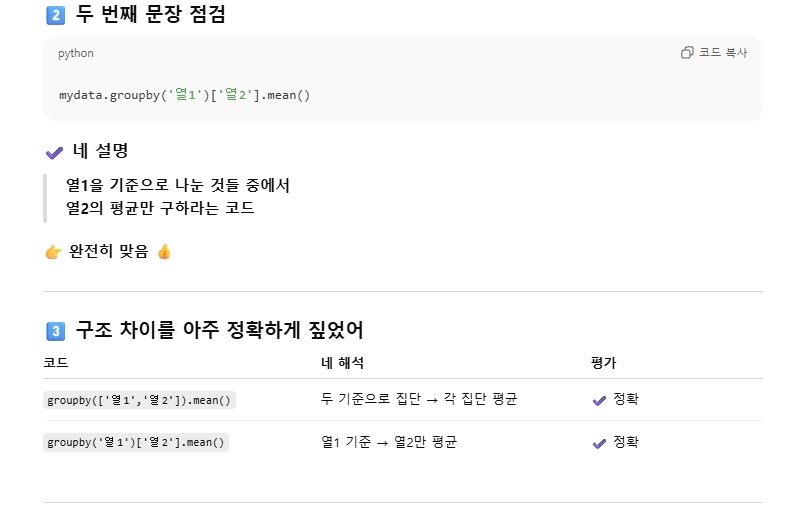

### 💠 피벗테이블(Pivot Table) 간단히 보기

> `pivot_table()`은 데이터를 **엑셀처럼 표 형태로 요약**하는 함수입니다.  
> `groupby()`와 비슷하지만, 행(index)과 열(columns)을 동시에 지정할 수 있습니다.



In [10]:
# 사고유형구분별 사고건수와 사상자수 평균 요약
mydata.pivot_table(
    index='사고유형구분',
    values=['사고건수', '사상자수'],   #여기는 열! 열에는 사고건수, 사상자수 해줘
    aggfunc='mean'                     #그리고 그 값은 평균으로 해줘
).round(2)                             #평균은 소수점 둘째자리까지 나타내줘.


# index= 행(Row)로 올 변수(=구분기준이 되는 변수)
# values= 계산할 열(Column)
# aggfunc = 계산 방법(aggregate function)(aggregate = 집계)

mydata.groupby('사고유형구분')[['사고건수','사상자수']].mean().round(2) #이 코드 쓰면 위의 피벗테이블과 동일한 결과가 나온다.
#여기서 [[]]로 해야하는 이유는 열 선택에서 한 것과 같다. mydata[['열1','열2']] 처럼 데이터프레임에서 열 두개를 선택할 때에는 대괄호가 두 번 필요했다.
#이것과 마찬가지로 .groupby() 한 이후에 mydata에서 열 두개 '''선택'''하려면 대괄호 두 번 해줘야 한다!

,사고건수,사상자수
사고유형구분,,
무단횡단,5.64,6.01
보행노인,4.11,4.34
보행노인사고,5.44,5.33
보행어린이,3.41,3.69
스쿨존어린이,2.05,2.20
자전거,5.30,5.57


pivot_table은 groupby 기능 + 표 형태 재배치를 한 번에 하는 도구이고,
groupby도 칼럼 두 개를 기준으로 그룹을 만드는 것이 완전히 가능하다.

즉,

계산(평균·합계)을 하고 싶으면 → groupby

표 형태로 정리해서 보기 좋게 만들고 싶으면 → pivot_table(지피티 설명)

### 🧩 데이터 합치기(Concatenate / Merge) - 여기에선 소개만!

> pandas에서는 여러 개의 데이터를 하나로 **합칠(merge)** 수도 있습니다.  
> 예: 학번별 성적표와 출석표를 합치는 경우

* `pd.concat()` → 행 또는 열 방향으로 단순 연결  
* `pd.merge()` → 공통된 열(key)을 기준으로 합치기  
(엑셀의 VLOOKUP 또는 SQL의 JOIN과 유사)

* 데이터 합치기는 심화 과정에서 더 자세히 배우세요^^


In [11]:
# ----------------------------------------------------
# 🧩 데이터 합치기 간단 예시 (Concatenate)
# ----------------------------------------------------

import pandas as pd

# 예시 데이터 2개 만들기
data1 = pd.DataFrame({'이름': ['철수', '영희'], '점수': [85, 90]})     #{'이름': ['철수', '영희'], '점수': [85, 90]} 이거 자체는 사전형 자료형이다. 이때 key값은 열이름이 되는 것이고, 철수 영희 즉, value는 열 밑에 값들로 들어가는 것이다.
data2 = pd.DataFrame({'이름': ['민수', '수지'], '점수': [88, 92]})
#요걸 실행하면 사전형을 데이터프레임으로 바뀐 것이다,. 부분 실행한 것은 사전형이다 아직!

# 두 데이터를 위아래로 합치기 (행 결합)
result = pd.concat([data1, data2])

print("✅ 두 데이터프레임 합치기 결과:")
print(result)

#여기 밑에는 내가 해본 것 점수 행을 오름차순으로 정리함.
result2 = result.sort_values('점수', ascending=True)


✅ 두 데이터프레임 합치기 결과:
   이름  점수
0  철수  85
1  영희  90
0  민수  88
1  수지  92


### 🧼 데이터 정제 (Cleaning)

> 분석 전에 데이터에 **빈값(결측치)** 이 있는지 확인하고  
> 간단히 채워 넣어 데이터를 깨끗하게 만듭니다.

- 데이터에 결측치가 있으면 통계 계산이 안 될 수 있습니다.  
- 분석 전에 꼭 결측치를 확인하고, 필요하다면 0이나 평균값으로 채웁니다.



In [16]:
# ----------------------------------------------------
# 🧼 결측치 처리 (Cleaning)
# ----------------------------------------------------
# 🕳️ 1️⃣ 결측치 확인
print("📊 각 열의 결측치 개수:")
print(mydata.isnull().sum())       #mydata에 null이 있니? 만약 있으면 그거 다 합쳐줘
mydata.isnull()
# ----------------------------------------------------
# 참고 🧩 .isnull() 의 역할
# ----------------------------------------------------
# 👉 각 셀의 값이 결측치(NaN)인지 검사해서 True/False로 이루어진 DataFrame 을 반환

# 예시 코드
import pandas as pd
import numpy as np

data = {'이름': ['철수', '영희', '후니'],  # np.nan: NumPy 라이브러리의 특수한 값인 결측값- Not a Number" 의 약자
        '점수': [90, np.nan, 85]}

df = pd.DataFrame(data)         #사전형 객체를 데이터프레임으로 바꿈.
print(df)

df.isnull()
df.isnull().sum()

#아래처럼 대체가 가능!
df.fillna(df['점수'].mean())
df.dropna()  #결측값을 버린다
df.fillna(1000)  # 요런식으로 갑 하나 넣는 것도 가능하지만, 결측값 처리할 떄 평균을 보통 많이 넣으니까!
# ----------------------------------------------------
# 🗑️ 2️⃣ 결측치 제거 (dropna)
# ----------------------------------------------------
# 결측치가 포함된 행 전체를 제거한 새 데이터프레임 생성
mydata_dropna = mydata.dropna()        #결측치를 다 없애고 새로운 데이터프레임 변수를 만드는 것.
print("\n🗑️ 결측치가 있는 행 제거 후 데이터 개수:", len(mydata_dropna))     #이 경우 결측치가 없어서 데이터 개수가 그대로이다.

# ----------------------------------------------------
# 🧩 3️⃣ 결측치 대체 (fillna)
# ----------------------------------------------------
# 원본을 복사해 안전하게 작업
mydata_clean = mydata.copy() #mydata.copy(): Pandas의 DataFrame mydata를 복사(duplicate) 해서 새로운 독립된 데이터프레임을 만드는 함수

# (1) 모든 결측치를 0으로 채우기
mydata_fill0 = mydata_clean.fillna(0)

# (2) 특정 변수(예: '사고건수')의 결측치를 평균값으로 채우기
mydata_clean['사고건수'] = mydata_clean['사고건수'].fillna(
    mydata_clean['사고건수'].mean()
)  #fillna()해도 원본 데이터에는 아무런 변화가 없다.
# 즉, 수정된 새로운 값을 반환하는 함수니까! 그래서 반드시 다시 원본 데이터프레임에 열에다가 재할당을 해야한다.

mydata_clean = mydata_clean['사고건수'].fillna(
    mydata_clean['사고건수'].mean()
)  # 만약 변수 할당할 떄 인덱스를 지정해주지 않으면?
# 그냥 mydata_clean은 사고건수 사례만 남게 된다. 즉, 시리즈가 되었다.위험하니까 반드시 mydata_clean['사고건수']로 해야한다




📊 각 열의 결측치 개수:
사고지역관리번호       0
사고연도           0
사고유형구분         0
위치코드           0
사고다발지역시도시군구    0
사고지역위치명        0
사고건수           0
사상자수           0
사망자수           0
중상자수           0
경상자수           0
부상신고자수         0
위도             0
경도             0
사고다발지역폴리곤정보    0
데이터기준일자        0
제공기관코드         0
제공기관명          0
dtype: int64
   이름    점수
0  철수  90.0
1  영희   NaN
2  후니  85.0

🗑️ 결측치가 있는 행 제거 후 데이터 개수: 13372


In [17]:
# 실습: 다음 자료에서 결측치 확인하고, 결측치 제거하고, 평균값으로 결측치 대체해보기

import pandas as pd
import numpy as np

data = {'이름': ['철수', '영희', '후니'],
        '점수': [90, np.nan, 85]}

df = pd.DataFrame(data)

# 결측치 확인
df.isnull().sum()    #점수라는 칼럼에 결측치가 하나가 있어요! 라는 것이다.

# 결측치 제거
df_dropna = df.dropna()     #영희가 들어있는 '행'이 없어지낟(당연히 열이 없어지지는 않겠지...)

# 평균값 결측치 대체하기
df_clean = df.copy() #원래 데이터셋 바로 수정하는건 좀 그러니까 기존 데이터 df는 살아있다.
# 즉, 이건 다른이름으로 저장하는 방법이다.

df_clean['점수'].fillna(df_clean['점수'].mean())
#na에 fill하고 싶다! 뭐를? 점수의 평균값을 넣어줘.

,점수
0,90.0
1,87.5
2,85.0


## 📈 7️⃣ 간단한 통계 (Statistics)

> 데이터를 요약하고, 변수 간의 관계를 살펴봅니다.  
> 평균, 최솟값, 상관관계 등을 빠르게 확인해  
> 데이터의 전반적인 특징을 파악할 수 있습니다.

---

### 📘 주요 함수

* `mean()` → 평균  
* `median()` → 중앙값  
* `min()`, `max()` → 최소·최대값  
* `std()` → 표준편차  
* `corr()` → 변수 간 상관관계  
* `describe()` → 기초 통계 요약(평균, 표준편차, 사분위 등)

💡 **Tip:**  
> 통계 함수를 활용하면 데이터의 **분포와 변동성**을 한눈에 파악할 수 있습니다.


In [18]:
# 전체 변수의 평균
mydata.mean(numeric_only=True).round(2)

# 특정 변수의 통계값 확인
mydata['사고건수'].describe().round(2)
mydata.describe().round(2)

# 변수 간 상관관계 확인
mydata.corr(numeric_only=True).round(2)

# mydata[['사고건수','사고연도']].corr() 내가 해봄. 이렇게 보니까 사고연도와 사고건수의 상관관계만 보인다! 전부 다 보이는게 아니라
# 여기서 알 수 있는 사실 mydata에서 특정한 열 인덱싱 즉, 선택을 먼저 한 후에 .함수()를 해줘야 한다. 형식이 그래!

,사고지역관리번호,사고연도,위치코드,사고건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,위도,경도
사고지역관리번호,1.00,0.07,0.00,-0.02,-0.01,-0.03,-0.03,0.02,0.02,-0.01,0.01
사고연도,0.07,1.00,-0.09,-0.10,-0.09,-0.05,-0.17,0.05,0.05,0.04,-0.02
위치코드,0.00,-0.09,1.00,-0.16,-0.16,0.03,-0.02,-0.13,-0.21,-0.39,0.17
사고건수,-0.02,-0.10,-0.16,1.00,0.95,0.01,0.62,0.53,0.28,0.09,-0.02
사상자수,-0.01,-0.09,-0.16,0.95,1.00,0.02,0.62,0.59,0.32,0.09,-0.02
사망자수,-0.03,-0.05,0.03,0.01,0.02,1.00,-0.02,-0.21,-0.12,-0.04,0.00
중상자수,-0.03,-0.17,-0.02,0.62,0.62,-0.02,1.00,-0.16,-0.09,-0.04,0.07
경상자수,0.02,0.05,-0.13,0.53,0.59,-0.21,-0.16,1.00,0.12,0.11,-0.08
부상신고자수,0.02,0.05,-0.21,0.28,0.32,-0.12,-0.09,0.12,1.00,0.17,-0.07
위도,-0.01,0.04,-0.39,0.09,0.09,-0.04,-0.04,0.11,0.17,1.00,-0.54


## 💾 8️⃣ 데이터(파일) 저장하기 (Export)

> 분석이 끝난 데이터를 파일로 저장하면,  
> 다시 불러오거나 다른 사람과 공유할 수 있습니다.

---

### 📘 저장 형식
* 가장 많이 쓰는 형식은 **CSV**와 **Excel**입니다.
* pandas의 `to_csv()` 또는 `to_excel()` 메서드를 이용해 **DataFrame(df)**을 파일로 저장할 수 있습니다.

1️⃣ CSV 형식으로 저장  
→ `df.to_csv("data.csv", encoding='utf-8-sig', index=False)`  

2️⃣ Excel 형식으로 저장  
→ `df.to_excel("data.xlsx", index=False)`

---

### ⚠️ 저장 시 유의사항
1. **덮어쓰기 주의:** 동일한 파일명이 이미 존재하는지 확인  
2. **한글 인코딩:** `"utf-8-sig"`로 지정 (한글 깨짐 방지)  
3. **확장자:** `.csv` 또는 `.xlsx`를 반드시 포함  
4. **경로:** 정확한 경로를 지정해야 원하는 위치에 저장됨



In [19]:
# ----------------------------------------------------
# 💾 데이터 저장하기 (Export)
# ----------------------------------------------------
# 분석 또는 수정한 데이터를 엑셀 파일로 저장합니다.
# 예: '교통사고데이터_정제본.xlsx'

mydata_clean.to_excel("/content/drive/MyDrive/mypython/mypandas/교통사고데이터_정제본.xlsx", index=False)
print("✅ 엑셀 파일 저장 완료!\n")

# ----------------------------------------------------
# 📂 저장된 파일 다시 불러와서 확인하기
# ----------------------------------------------------
new_mydata = pd.read_excel("/content/drive/MyDrive/mypython/mypandas/교통사고데이터_정제본.xlsx")

print("📄 저장된 파일 미리보기:")
print(new_mydata.head())



✅ 엑셀 파일 저장 완료!

📄 저장된 파일 미리보기:
   사고건수
0     4
1     5
2     5
3     5
4     6


## 💻 예시: 직접 만들어 저장해보기

> 이번에는 실제 데이터를 불러오지 않고,  
> **직접 DataFrame을 만들어 CSV와 Excel 형식으로 저장**해 봅니다.

이 과정을 통해  
- `to_csv()`와 `to_excel()`의 차이를 이해하고,  
- 저장된 파일을 다시 불러와 확인하는 연습을 합니다.


In [20]:
# ----------------------------------------------------
# 💻 예시 DataFrame 저장하기 (실습)
# ----------------------------------------------------
# 간단한 DataFrame을 만들어 CSV와 Excel 형식으로 저장해 봅니다.

import pandas as pd

# 예시 데이터 생성
data = {
    "이름": ["철수", "영희", "민수"],
    "점수": [85, 90, 78]
}

df = pd.DataFrame(data)
print("📋 예시 DataFrame:")
print(df, "\n")

# CSV 파일로 저장 (utf-8-sig 인코딩)
df.to_csv("/content/drive/MyDrive/mypython/mypandas/학생점수.csv",
          encoding="utf-8-sig", index=False)
print("✅ CSV 파일로 저장 완료!\n")

# Excel 파일로 저장
df.to_excel("/content/drive/MyDrive/mypython/mypandas/학생점수.xlsx",
            index=False)
print("✅ Excel 파일로 저장 완료!\n")

# ----------------------------------------------------
# 📂 저장된 파일 다시 불러와 확인하기
# ----------------------------------------------------
new_df = pd.read_excel("/content/drive/MyDrive/mypython/mypandas/학생점수.xlsx")

print("📄 저장된 파일 미리보기:")
print(new_df.head())


📋 예시 DataFrame:
   이름  점수
0  철수  85
1  영희  90
2  민수  78 

✅ CSV 파일로 저장 완료!

✅ Excel 파일로 저장 완료!

📄 저장된 파일 미리보기:
   이름  점수
0  철수  85
1  영희  90
2  민수  78
